In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

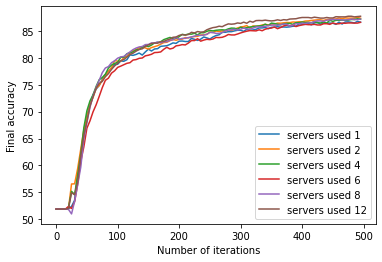

In [2]:
total_gradient_time = []
total_time = []
total_acc=[]
std_acc=[]
for idx in [1,2,4,6,8, 12]:
    s10w1_1 = json.load(open("/mnt/lab_data3/anusri/CS244B/CS244BParameterServer/results/servers_"+str(idx)+"_workerss_1_try_1.json"))
    s10w1_2 = json.load(open("/mnt/lab_data3/anusri/CS244B/CS244BParameterServer/results/servers_"+str(idx)+"_workerss_1_try_2.json"))
    s10w1_3 = json.load(open("/mnt/lab_data3/anusri/CS244B/CS244BParameterServer/results/servers_"+str(idx)+"_workerss_1_try_3.json"))
    tot_time = (np.array(s10w1_1["total_time"][1:])+np.array(s10w1_2["total_time"][1:])+np.array(s10w1_2["total_time"][1:]))/3
    tot_grad_time = (np.array(s10w1_1["gradient_time"][1:])+np.array(s10w1_2["gradient_time"][1:])+np.array(s10w1_2["gradient_time"][1:]))/3
    tot_acc = (np.array(s10w1_1["accuracy"][0:])+np.array(s10w1_2["accuracy"][0:])+np.array(s10w1_2["accuracy"][0:]))/3
    
    plt.plot(np.arange(0,500,5), tot_acc, label="servers used "+str(idx))
    total_gradient_time.append(np.mean(tot_grad_time))
    total_time.append(np.mean(tot_time))

    val = [np.max(s10w1_1["accuracy"]), np.max(s10w1_2["accuracy"]), np.max(s10w1_3["accuracy"])]
    total_acc.append(np.mean([val]))
    std_acc.append(np.std(val))

plt.xlabel("Number of iterations")
plt.ylabel("Final accuracy")
    
plt.legend()


In [3]:
s10w1_1.keys()

dict_keys(['total_time', 'gradient_time', 'accuracy'])

Text(0, 0.5, 'Gradient update time to parameter server')

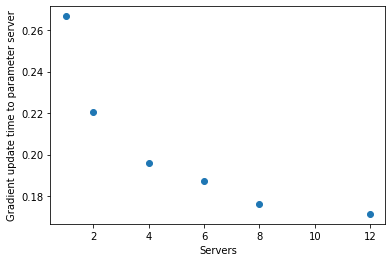

In [4]:
plt.scatter([1,2,4,6,8, 12], total_gradient_time)
plt.xlabel("Servers")
plt.ylabel("Gradient update time to parameter server")

(85.0, 90.0)

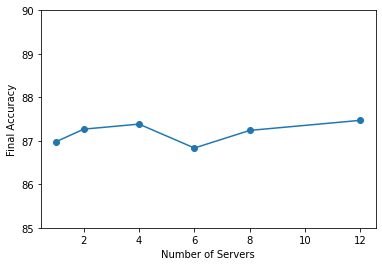

In [5]:
#plt.errorbar([1,2,4,6,8,10,12], total_acc, std_acc)
plt.scatter([1,2,4,6,8,12], total_acc)
plt.plot([1,2,4,6,8,12], total_acc)

plt.xlabel("Number of Servers")
plt.ylabel("Final Accuracy")
plt.ylim(85,90)

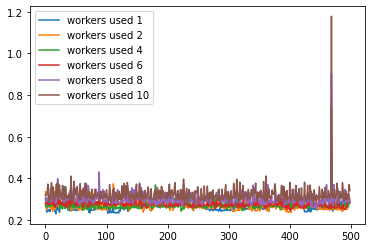

In [6]:
total_gradient_time_w = []
total_time_w=[]
total_acc_w =[]
std_acc_w =[]
for idx in [1,2,4,6, 8,10]:
    s10w1_1 = json.load(open("/mnt/lab_data3/anusri/CS244B/CS244BParameterServer/results/servers_1_workerss_"+str(idx)+"_try_1.json"))
    s10w1_2 = json.load(open("/mnt/lab_data3/anusri/CS244B/CS244BParameterServer/results/servers_1_workerss_"+str(idx)+"_try_2.json"))
    s10w1_3 = json.load(open("/mnt/lab_data3/anusri/CS244B/CS244BParameterServer/results/servers_1_workerss_"+str(idx)+"_try_3.json"))
    tot_time = (np.array(s10w1_1["total_time"][1:])+np.array(s10w1_2["total_time"][1:])+np.array(s10w1_2["total_time"][1:]))/3
    total_acc = (np.array(s10w1_1["accuracy"])+np.array(s10w1_2["accuracy"])+np.array(s10w1_2["accuracy"]))/3
    tot_grad_time = (np.array(s10w1_1["gradient_time"][1:])+np.array(s10w1_2["gradient_time"][1:])+np.array(s10w1_2["gradient_time"][1:]))/3

    plt.plot(tot_grad_time, label="workers used "+str(idx))
    total_gradient_time_w.append(np.mean(tot_grad_time))
    total_time_w.append(np.mean(tot_time))
    
    val = [np.max(s10w1_1["accuracy"]), np.max(s10w1_2["accuracy"]), np.max(s10w1_3["accuracy"])]
    total_acc_w.append(np.mean([val]))
    std_acc_w.append(np.std(val))
    
plt.legend()

Text(0, 0.5, 'Final accuracy in model parallel')

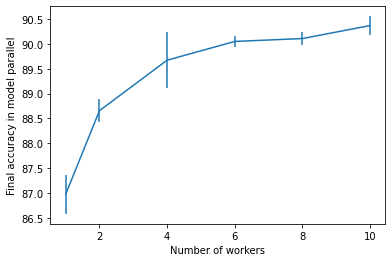

In [7]:
plt.errorbar([1,2,4,6,8,10], total_acc_w, std_acc_w)
plt.xlabel("Number of workers")
plt.ylabel("Final accuracy in model parallel")

Text(0, 0.5, 'Gradient update time to  \n parameter server per iteration')

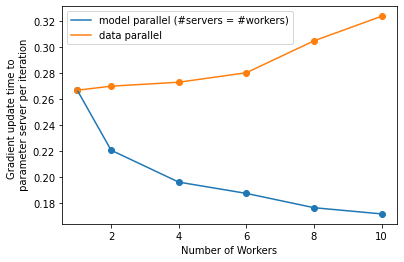

In [8]:
plt.scatter([1,2,4,6,8,10], total_gradient_time)
plt.plot([1,2,4,6, 8,10], total_gradient_time, label="model parallel (#servers = #workers)")

plt.scatter([1,2,4,6, 8,10], total_gradient_time_w)
plt.plot([1,2,4,6, 8,10], total_gradient_time_w, label="data parallel")

plt.legend()
plt.xlabel("Number of Workers")
plt.ylabel("Gradient update time to  \n parameter server per iteration")

Text(0, 0.5, 'Total time per iteration')

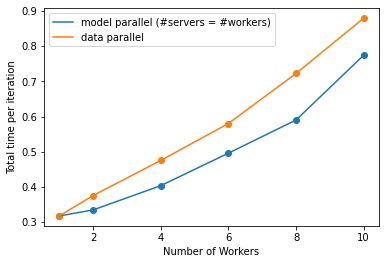

In [9]:
plt.scatter([1,2,4,6,8,10], total_time)
plt.plot([1,2,4,6,8,10], total_time, label="model parallel (#servers = #workers)")

plt.scatter([1,2,4,6,8,10], total_time_w)
plt.plot([1,2,4,6,8,10], total_time_w, label="data parallel")

plt.legend()
plt.xlabel("Number of Workers")
plt.ylabel("Total time per iteration")

In [10]:
total_gradient_time

[0.26658941573434136,
 0.22047560455485352,
 0.1959372907777428,
 0.18725488802235207,
 0.17626450805562136,
 0.1714831851049511]

In [11]:
total_gradient_time_w

#12:1
#6:2
#4:3
#3:4
#2:6
#1:12


[0.26658941573434136,
 0.26968396068336015,
 0.2727352813154997,
 0.2800340865879913,
 0.3045476054699324,
 0.32346452166417794]

12
40
6
82
4
99
3
99
2
99
1
99


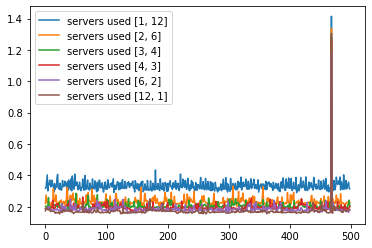

In [12]:
total_gradient_time_1 = []
total_time_1 = []
total_acc_1 =[]
total_std_1 =[]
for idx in [[1,12],[2,6],[3,4],[4,3], [6,2], [12,1]]:
    s0 = idx[0]
    w0 = idx[1]
    s10w1_1 = json.load(open("/mnt/lab_data3/anusri/CS244B/CS244BParameterServer/results/servers_"+str(s0)+"_workerss_"+str(w0)+"_try_1.json"))
    s10w1_2 = json.load(open("/mnt/lab_data3/anusri/CS244B/CS244BParameterServer/results/servers_"+str(s0)+"_workerss_"+str(w0)+"_try_2.json"))
    s10w1_3 = json.load(open("/mnt/lab_data3/anusri/CS244B/CS244BParameterServer/results/servers_"+str(s0)+"_workerss_"+str(w0)+"_try_3.json"))
    tot_time = (np.array(s10w1_1["total_time"][1:])+np.array(s10w1_2["total_time"][1:])+np.array(s10w1_2["total_time"][1:]))/3
    tot_grad_time = (np.array(s10w1_1["gradient_time"][1:])+np.array(s10w1_2["gradient_time"][1:])+np.array(s10w1_2["gradient_time"][1:]))/3
    tot_acc = (np.array(s10w1_1["accuracy"][1:500//w0])+np.array(s10w1_2["accuracy"][1:500//w0])+np.array(s10w1_2["accuracy"][1:500//w0]))/3
    
    plt.plot(tot_grad_time, label="servers used "+str(idx))
    total_gradient_time_1.append(np.mean(tot_grad_time))
    total_time_1.append(np.mean(tot_time))

    print(w0)
    print(len(s10w1_1["accuracy"][1:500//w0]))
    val = [np.max(s10w1_1["accuracy"][1:(500//w0)//5]), np.max(s10w1_2["accuracy"][1:(500//w0)//5]), np.max(s10w1_3["accuracy"][1:(500//w0)//5])]
    #val = [np.max(s10w1_1["accuracy"][1:]), np.max(s10w1_2["accuracy"][1:]), np.max(s10w1_3["accuracy"][1:])]

    total_acc_1.append(np.mean([val]))
    total_std_1.append(np.std(val))
    
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Total time per iteration')

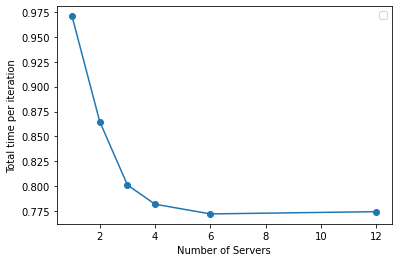

In [13]:
plt.scatter([1,2,3,4,6,12], total_time_1)
plt.plot([1,2,3,4,6,12], total_time_1)

plt.legend()
plt.xlabel("Number of Servers")
plt.ylabel("Total time per iteration")

Text(0, 0.5, 'Final accuracy')

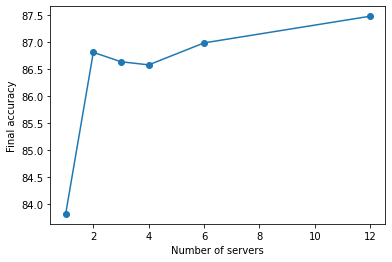

In [14]:
#plt.errorbar([1,2,3,4,6,12], total_acc_1, total_std_1)
plt.scatter([1,2,3,4,6,12], total_acc_1)
plt.plot([1,2,3,4,6,12], total_acc_1)
plt.xlabel("Number of servers")
plt.ylabel("Final accuracy")